In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## load the dataset
bank = pd.read_csv('bank.csv', sep = '["]*;["]*', engine='python')
bank.head()

,"""age",job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,"y"""""""
0,"""56",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""""""
1,"""57",services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""""""
2,"""37",services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""""""
3,"""40",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""""""
4,"""56",services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""""""


In [5]:
## somthing wrong with the 'age' and 'y' columns, we need to fix it 
bank['age'] = bank['"age'].str.extract(r'["](\d+)')
bank.drop('"age', axis = 1, inplace = True)                       ## drop originial 'age' column
bank['age'] = bank['age'].astype(int)
bank['subscribe'] = bank['y"""'].str.extract(r'(\w+)["""]') 
bank.drop('y"""', axis = 1, inplace = True)                       ## drop original 'y''''' column
bank.head() 

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,subscribe
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,56,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,57,no
2,services,married,high.school,no,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,37,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,40,no
4,services,married,high.school,no,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,56,no


In [6]:
## check the dataset further
bank.info()
bank.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  object 
 1   marital         41188 non-null  object 
 2   education       41188 non-null  object 
 3   default         41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
age               False
subscribe         False
dtype: bool

In [7]:
## check the unique values for the categorical variables
bank['job'].unique() 
bank['marital'].unique() 
bank['education'].unique() 
bank['default'].unique() 
bank['housing'].unique() 
bank['loan'].unique() 
bank['contact'].unique() 
bank['month'].unique() 
bank['day_of_week'].unique() 
bank['poutcome'].unique()
bank['subscribe'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

array(['no', 'unknown', 'yes'], dtype=object)

array(['no', 'yes', 'unknown'], dtype=object)

array(['no', 'yes', 'unknown'], dtype=object)

array(['telephone', 'cellular'], dtype=object)

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

array(['nonexistent', 'failure', 'success'], dtype=object)

array(['no', 'yes'], dtype=object)

#### we can see that the colums: job, marital, education, default, housing, loan have "unknown", so we need to fix this problem first

In [8]:
### set 'unknown' as nan 
bank[['job', 'marital', 'education', 'default', 'housing', 'loan']] = bank[['job', 'marital', 'education', 'default', 'housing', 'loan']].replace('unknown', np.NaN)

In [9]:
bank.isnull().any()

job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
age               False
subscribe         False
dtype: bool

In [10]:
bank.shape

(41188, 21)

In [11]:
bank.dropna(axis = 0, inplace = True)

In [12]:
bank.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,subscribe
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,56,no
2,services,married,high.school,no,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,37,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,40,no
4,services,married,high.school,no,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,56,no
6,admin.,married,professional.course,no,no,no,telephone,may,mon,139,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,59,no


In [13]:
## explore on the categorical variable
bank.describe(include = ['O'])
bank.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribe
count,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8737,17492,10412,30485,16521,25720,20443,9733,6395,25836,26629


,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,39.030012
std,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,10.333529
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,17.000000
25%,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,31.000000
50%,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,37.000000
75%,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,45.000000
max,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,95.000000


In [14]:
import seaborn as sns
%matplotlib inline

<Figure size 1008x216 with 0 Axes>

<Figure size 1008x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 1008x216 with 0 Axes>

<Figure size 576x216 with 0 Axes>

<Figure size 1008x216 with 0 Axes>

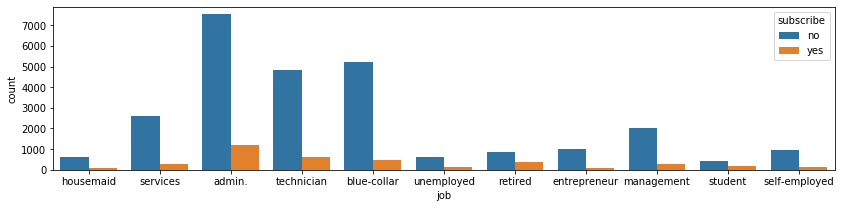

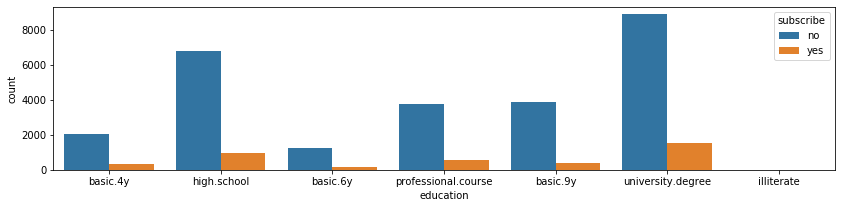

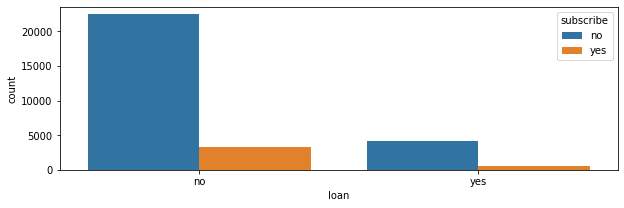

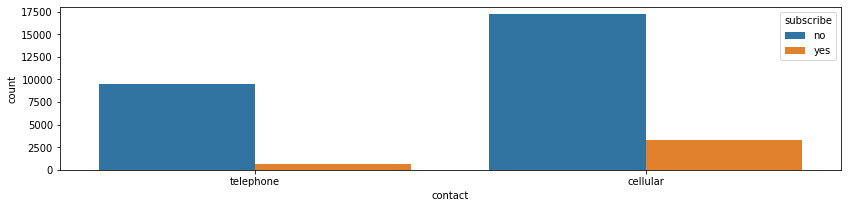

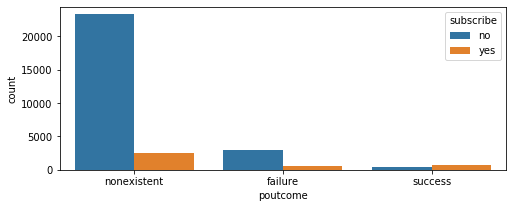

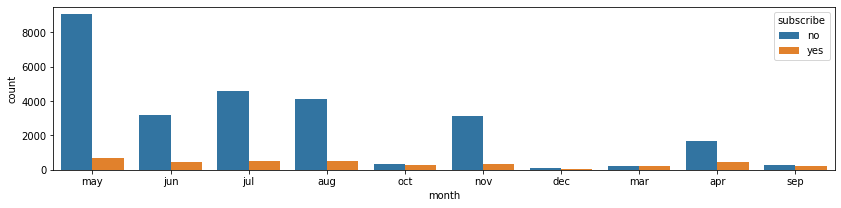

In [15]:
plt.figure(figsize=(14,3))
sns.countplot(x='job', hue = 'subscribe', data = bank)

plt.figure(figsize=(14,3))
sns.countplot(x='education', hue = 'subscribe', data = bank)

plt.figure(figsize=(10,3))
sns.countplot(x='loan', hue = 'subscribe', data = bank)

plt.figure(figsize=(14,3))
sns.countplot(x='contact', hue = 'subscribe', data = bank)

plt.figure(figsize=(8,3))
sns.countplot(x='poutcome', hue = 'subscribe', data = bank)

plt.figure(figsize=(14,3))
sns.countplot(x='month', hue = 'subscribe', data = bank)

### from these distribution plots above, we can see that education, loan, contact, the poutcome these features seems to have some influence on the target variable

In [16]:
### drop month and day of week
bank.drop(['month','day_of_week'], axis = 1, inplace = True)

In [17]:
## handle with categorical variable 
## job
job_to_no = {
    'housemaid':0,
    'services': 1,
    'blue-collar': 2,
    'retired': 3,
    'student': 4,
    'unemployed':5,
    'self-employed':6,
    'admin.':7,
    'management':8,
    'entrepreneur':9,
    'technician':10
}
bank['job'] = bank['job'].map(job_to_no).astype(int)

In [18]:
bank['job'].unique() 

array([ 0,  1,  7, 10,  2,  5,  3,  9,  8,  4,  6])

In [19]:
### marital
ma_to_no = {
    'married':1,
    'single': 2,
    'divorced': 3,
}
bank['marital'] = bank['marital'].map(ma_to_no).astype(int)

In [20]:
### education
edu_to_no = {
    'illiterate':0,
    'basic.4y': 1,
    'high.school': 2,
    'basic.6y' : 3,
    'professional.course' : 4,
    'basic.9y': 5,
    'university.degree': 6,
}
bank['education'] = bank['education'].map(edu_to_no).astype(int)

In [21]:
### default
de_to_no = {
    'no':0,
    'yes':1
}
bank['default'] = bank['default'].map(de_to_no).astype(int)

In [22]:
### housing,loan
to_no = {
    'no':0,
    'yes':1
}
bank['housing'] = bank['housing'].map(to_no).astype(int)
bank['loan'] = bank['loan'].map(to_no).astype(int)

In [23]:
### contact
cn_to_no = {
    'telephone': 1,
    'cellular': 2
}
bank['contact'] = bank['contact'].map(cn_to_no).astype(int)

In [24]:
### poutcome
po_to_no = {
    'nonexistent': 0,
    'failure': 1,
    'success': 2
}
bank['poutcome'] = bank['poutcome'].map(po_to_no).astype(int)

In [26]:
bank.head()

,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,subscribe
0,0,1,1,0,0,0,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,56,no
2,1,1,2,0,1,0,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,37,no
3,7,1,3,0,0,0,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,40,no
4,1,1,2,0,0,1,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,56,no
6,7,1,4,0,0,0,1,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,59,no


In [26]:
bank['poutcome'].unique()

array([0, 1, 2])

In [27]:
bank[bank['subscribe'] == 'yes'].shape[0]/30488 

0.1265743899239045

In [28]:
bank.head()

,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,subscribe
0,0,1,1,0,0,0,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,56,no
2,1,1,2,0,1,0,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,37,no
3,7,1,3,0,0,0,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,40,no
4,1,1,2,0,0,1,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,56,no
6,7,1,4,0,0,0,1,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,59,no


### Next, we are going to check the numeric features

In [29]:
### pdays: number of days that passed by after the client was 
### last contacted from a previous campaign (numeric; 999 means client was not previously contacted
bank_c = bank

In [30]:
bank_c.pdays.replace(999,0,inplace = True)

In [31]:
bank_c

,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,subscribe
0,0,1,1,0,0,0,1,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,56,no
2,1,1,2,0,1,0,1,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,37,no
3,7,1,3,0,0,0,1,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,40,no
4,1,1,2,0,0,1,1,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,56,no
6,7,1,4,0,0,0,1,139,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,59,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,1,4,0,1,0,2,334,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,73,yes
41184,2,1,4,0,0,0,2,383,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,46,no
41185,3,1,6,0,1,0,2,189,2,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,56,no
41186,10,1,4,0,0,0,2,442,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,44,yes


### split into train and test dataset and scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [33]:
X_or = bank_c.loc[:, bank.columns != 'subscribe']
y = bank['subscribe']

In [34]:
X_train_or, X_test_or, y_train, y_test = train_test_split(X_or, y, random_state = 0)

In [35]:
### minmax scale
scal= MinMaxScaler()
X_train = scal.fit_transform(X_train_or)   
X_test = scal.transform(X_test_or)

### KNNClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

#### Naive Grid Search

In [39]:
## fit model
train_score_array = []
test_score_array = []
krange = [2, 3, 10, 15, 20,30]
for k in krange:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

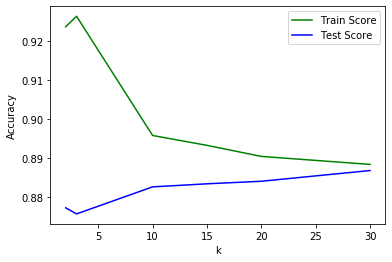

In [40]:
x_axis = [2, 3, 10, 15, 20,30]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()   

In [58]:
train_score_array
test_score_array

[1.0,
 1.0,
 0.9998250677862328,
 0.9997376016793492,
 0.9991253389311642,
 0.998119478702003]

[1.0,
 1.0,
 0.998950406717397,
 0.9985568092364209,
 0.9980320125951194,
 0.9973760167934925]

#### we use naive grid searich to get the best k should be 20, the test score is 0.885

#### Grid Search with Cross-Validation

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
para_knn = {'n_neighbors':[2, 3, 10, 15, 20,30]}

In [39]:
gs_cv_knn = GridSearchCV(KNeighborsClassifier(), para_knn, cv=5, return_train_score=True)  ## change the scoreing agrument

In [40]:
gs_cv_knn.fit(X_train, y_train)
print("Best parameters: {}".format(gs_cv_knn.best_params_))
print("Best cross-validation score: {:.3f}".format(gs_cv_knn.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 10, 15, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'n_neighbors': 20}
Best cross-validation score: 0.884


In [42]:
best_knn = KNeighborsClassifier( n_neighbors= 20)
best_knn.fit(X_train, y_train)
best_knnpred = best_knn.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [45]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, best_knnpred)
print(conf)

[[6542  120]
 [ 764  196]]


In [49]:
import mglearn

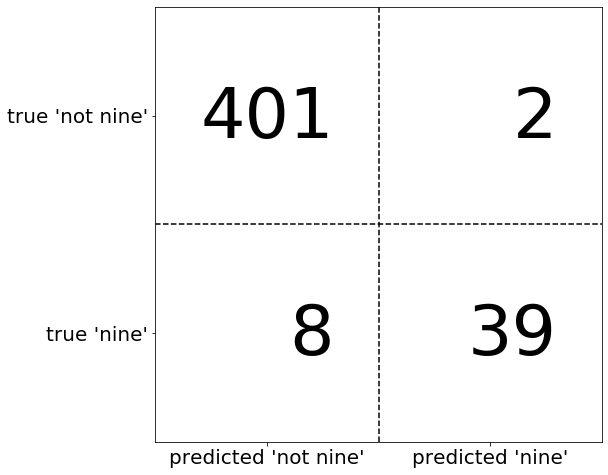

In [50]:
mglearn.plots.plot_confusion_matrix_illustration()

#### we use grid searich with cross validation to get the best k should be 10, the cross-validation score is 0.88

### Logistic Regression

#### Naive Grid Search

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
c_range = [0.1, 1, 10]

In [45]:
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

In [46]:
for c in c_range:
    log_1 = LogisticRegression(C = c, random_state = 0, solver = 'liblinear', penalty = 'l1')
    log_2 = LogisticRegression(C = c, random_state = 0, solver = 'liblinear', penalty = 'l2')
    log_1.fit(X_train, y_train)
    log_2.fit(X_train, y_train)
    train_score_l1.append(log_1.score(X_train, y_train))
    train_score_l2.append(log_2.score(X_train, y_train))
    test_score_l1.append(log_1.score(X_test, y_test))
    test_score_l2.append(log_2.score(X_test, y_test))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Text(0.5, 0, 'c')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'l1')

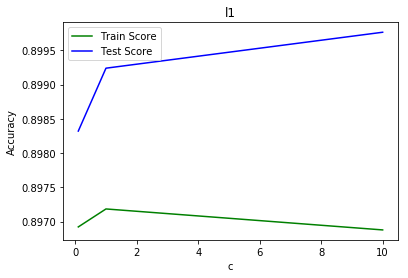

In [47]:
c_axis = [ 0.1, 1, 10]
plt.plot(c_axis, train_score_l1, label = 'Train Score', c = 'g')
plt.plot(c_axis, test_score_l1, label = 'Test Score', c='b')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend()
plt.title('l1')

Text(0.5, 0, 'c')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'l2')

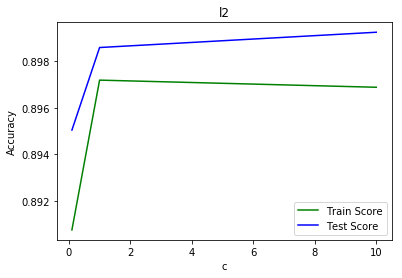

In [48]:
c_axis = [ 0.1, 1, 10]
plt.plot(c_axis, train_score_l2, label = 'Train Score', c = 'g')
plt.plot(c_axis, test_score_l2, label = 'Test Score', c='b')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend()
plt.title('l2')

#### for the logistic regression we have 0.8989 accuarcy with c equal to 1 based on the methon of naive grid search

#### Grid Search with Cross-Validation

In [49]:
para_logis = {'C': [0.1, 1, 10]}

In [50]:
gs_cv_logis = GridSearchCV(LogisticRegression(solver = 'lbfgs'), para_logis, cv=5, return_train_score=True)

In [51]:
gs_cv_logis.fit(X_train, y_train)
print("Best parameters: {}".format(gs_cv_logis.best_params_))
print("Best cross-validation score: {:.3f}".format(gs_cv_logis.best_score_))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score=True, scoring=None, verbose=0)

Best parameters: {'C': 1}
Best cross-validation score: 0.897


#### for the logistic regression we have cross-validation score equal to 0.897, with c equal to 1 based on the methon of  grid search with cross-validation, which is consistent with the result we got from naive grid search approach.

### Linear SVC

In [52]:
from sklearn.svm import LinearSVC

#### Naive Grid Search

In [53]:
train_score_array_svc = []
test_score_array_svc = []
for c in [0.01, 0.1, 1,10,20]:
    lsvc = LinearSVC(C = c, random_state = 0 ,dual = False, max_iter = 10000)
    lsvc.fit(X_train,y_train)
    train_score_array_svc.append(lsvc.score(X_train, y_train))
    test_score_array_svc.append(lsvc.score(X_test, y_test))

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=20, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

Text(0.5, 0, 'c')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'lineaerSVC')

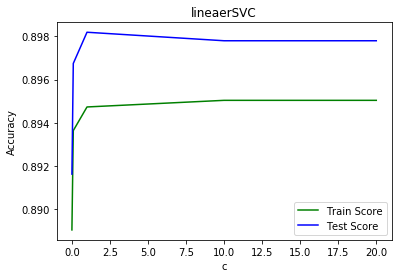

In [54]:
c_axis = [0.01, 0.1, 1,10,20]
%matplotlib inline
plt.plot(c_axis, train_score_array_svc, label = 'Train Score', c = 'g')
plt.plot(c_axis, test_score_array_svc, label = 'Test Score', c='b')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend()
plt.title('lineaerSVC')

#### for the linear SVC, we performed naive grid search and we found that the best c is 10, the test score is 0.8975

#### Grid Search with Cross-Validation

In [55]:
para_lsvc = {'C':[0.01, 0.1, 1,10,20]}
gs_cv_lsvc = GridSearchCV(LinearSVC(max_iter=10000), para_logis, cv=5, return_train_score=True)
gs_cv_lsvc.fit(X_train, y_train)
print("Best parameters: {}".format(gs_cv_lsvc.best_params_))
print("Best cross-validation score: {:.3f}".format(gs_cv_lsvc.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score=True, scoring=None, verbose=0)

Best parameters: {'C': 10}
Best cross-validation score: 0.895


#### for the linear SVC, we performed grid search with cross-validation and we also found that the best c is 10, the cross-validation score is 0.894, which is consistent with the result we got from the naive grid search approach

### Kerenilzed SVM

#### naive grid search

In [56]:
from sklearn.svm import SVC

In [57]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))
print('kernel = rbf')
best_score = 0
for gamma in [0.01, 0.1, 1, 10]:
    for C in [0.01, 0.1, 1, 10]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C, kernel = 'rbf')
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 22866   size of test set: 7622
kernel = rbf


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score: 0.89
Best parameters: {'C': 10, 'gamma': 0.1}


In [58]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))
print('kernel = linear')
best_score = 0
for gamma in [0.01, 0.1, 1, 10]:
    for C in [0.01, 0.1, 1, 10]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C, kernel = 'linear')
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 22866   size of test set: 7622
kernel = linear


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score: 0.89
Best parameters: {'C': 10, 'gamma': 0.01}


In [51]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))
print('kernel = poly')
best_score = 0
for gamma in [0.01, 0.1, 1]:
    for C in [0.01, 0.1, 1]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C, kernel = 'poly')
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 22866   size of test set: 7622
kernel = poly


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score: 0.90
Best parameters: {'C': 0.1, 'gamma': 1}


#### for the Kerenilzed Support Vector Machine, we use naive grid search and we found the best c is 100, and the best gamma is 0.1, the best test score is 0.90

#### Grid Search with Cross Validation

In [59]:
para_svc = {'C': [0.01, 0.1, 1],
            'gamma': [0.01, 0.1, 1],
            'kernel': ['rbf', 'poly', 'linear']}
gs_cv_svc = GridSearchCV(SVC(), para_svc, cv=5, return_train_score=True)
gs_cv_svc.fit(X_train, y_train)
print("Best parameters: {}".format(gs_cv_svc.best_params_))
print("Best cross-validation score: {:.3f}".format(gs_cv_svc.best_score_))

KeyboardInterrupt: 

#### for the Kerenilzed Support Vector Machine, we use  grid search with cross-validation and we found the best c is 100, and the best gamma is 0.1, the best cross-validation score is 0.897, which is consistent with the result we got from the naive approach

### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

#### naive grid search

In [61]:
dep_range = [1, 2, 3, 5, 6, 7, 8, 9, 10]
train_score_dtree = []
test_score_dtree = []

In [62]:
for m in dep_range:
    dtree = DecisionTreeClassifier(max_depth = m, random_state = 0)
    dtree.fit(X_train,y_train)
    train_score_dtree.append(dtree.score(X_train, y_train))
    test_score_dtree.append(dtree.score(X_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Text(0.5, 0, 'c')

Text(0, 0.5, 'Accuracy')

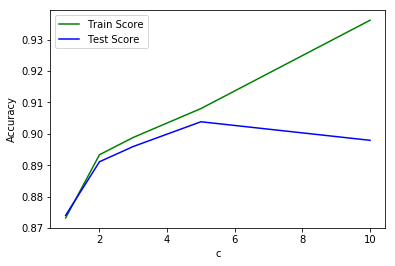

In [63]:
maxdepth = [1, 2, 3, 5, 10]
plt.plot(maxdepth, train_score_dtree, label = 'Train Score', c = 'g')
plt.plot(maxdepth, test_score_dtree, label = 'Test Score', c='b')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend()

#### for the decision tree model, we found the best 'max_depth' is 5 via naive grid search

#### Grid Search with Cross Validation

In [64]:
para_dtree = {'max_depth':[1, 2, 3, 5, 10]}
gs_cv_dtree = GridSearchCV(DecisionTreeClassifier(), para_dtree, cv=5, return_train_score=True)
gs_cv_dtree.fit(X_train, y_train)
print("Best parameters: {}".format(gs_cv_dtree.best_params_))
print("Best cross-validation score: {:.3f}".format(gs_cv_dtree.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

Best parameters: {'max_depth': 5}
Best cross-validation score: 0.903


#### for the decision tree model, we found the best 'max_depth' is 5 via grid search with cross-validation, which is consistent with the approach of naive grid search

#### draw the feature importance plot 

In [65]:
dtree_best = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dtree_best.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(dtree_best.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree_best.score(X_test, y_test)))

bank_c.columns[:-1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy on training set: 0.908
Accuracy on test set: 0.904


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'age'],
      dtype='object')

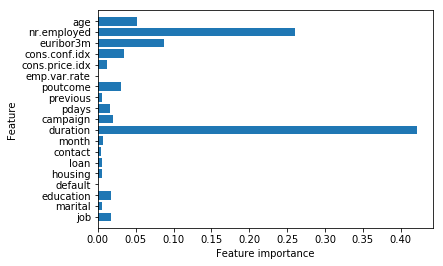

In [66]:
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),bank_c.columns[:-1] )
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(dtree)

#### from this feature importance plot, we can see that the 'duration' has the largest importance to predict the 'subscribe', which makes sense

## So far, we have performed the naive grid search on classification model, and then we use grid search with cross-validation to justify the model, finally we got the decision tree model with the highest accuarcy which is 0.908

### Imbalanced Dataset

In [67]:
## check whether it is an imbalanced dataset
bank[bank['subscribe'] == 1].shape[1]/30488

0.0006559958016268696

#### most_frequent

In [68]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Unique predicted labels: [0]
Test score: 0.87


#### we only predict the most frequent value which means we don't learn anything, we have the accuarcy equal to 0.87

#### confusion_matrix

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
### logistic regression prediction
log_i = LogisticRegression(C = 1, random_state = 0, solver = 'liblinear', penalty = 'l2')
log_i.fit(X_train,y_train)
pred_log = log_i.predict(X_test)
### Linear SVC prediction
lsvc_i = LinearSVC(C = 10, random_state = 0 ,dual = False, max_iter = 10000)
lsvc_i.fit(X_train,y_train)
pred_lsvc = lsvc_i.predict(X_test)
### SVC
svm_i = SVC(gamma = 0.1, C = 10,kernel = 'poly')
svm_i.fit(X_train, y_train)
pred_svm = svm_i.predict(X_test)
### Deicison Tree prediction
tree_i = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
pred_tree = tree_i.predict(X_test)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
### dummy model prediction
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [72]:
### confusion matrix
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_log))
print("\nLinear SVC")
print(confusion_matrix(y_test, pred_lsvc))
print("\nKerenilzed SVM")
print(confusion_matrix(y_test, pred_svm))
print("\nDecision Tree")
print(confusion_matrix(y_test, pred_tree))
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))


Logistic Regression
[[6497  165]
 [ 605  355]]

Linear SVC
[[6510  152]
 [ 629  331]]

Kerenilzed SVM
[[6562  100]
 [ 723  237]]

Decision Tree
[[6335  327]
 [ 406  554]]
Most frequent class:
[[6662    0]
 [ 960    0]]

Dummy model:
[[5816  846]
 [ 834  126]]


#### recall score measurement

In [73]:
from sklearn.metrics import recall_score
print("recall score logistic regression : {:.2f}".format(recall_score(y_test, pred_log)))
print("recall score linear svc: {:.2f}".format(recall_score(y_test, pred_lsvc)))
print("recall score kerenilzed svm: {:.2f}".format(recall_score(y_test, pred_svm)))
print("recall score decision tree: {:.2f}".format(recall_score(y_test, pred_tree)))

f1 score logistic regression : 0.37
f1 score linear svc: 0.34
f1 score kerenilzed svm: 0.25
f1 score decision tree: 0.58


#### Since we are focus on finding the subscribtion, we don't want to ignore the potintial customer, which means we want to keep the false negtive lower. Therefore, we may can use recall to repalce the accuracy as the measurement.